In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import xgboost as xg

In [2]:
train_data = pd.read_csv(r'C:\Users\meetd\OneDrive\Desktop\Datasets\house-prices-advanced-regression\train.csv')
test_data = pd.read_csv(r'C:\Users\meetd\OneDrive\Desktop\Datasets\house-prices-advanced-regression\test.csv')

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(train_data.shape)
print(test_data.shape)
x_test = test_data
x_train = train_data.loc[:, train_data.columns != 'SalePrice']
y_train = train_data.loc[:, train_data.columns == 'SalePrice']
print(x_train.shape)
x_train.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Id'],axis=1,inplace=True)
x_test.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Id'],axis=1,inplace=True)

(1460, 81)
(1459, 80)
(1460, 80)


C:\Users\meetd\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
x_train.LotFrontage.fillna(x_train.LotFrontage.median(skipna =True), inplace=True)
x_train.MasVnrArea.fillna(x_train.MasVnrArea.median(skipna =True), inplace=True)
x_train.GarageYrBlt.fillna(x_train.GarageYrBlt.median(skipna =True), inplace=True)

x_train.MasVnrType.fillna(x_train['MasVnrType'].value_counts().index[0], inplace=True)
x_train.BsmtQual.fillna(x_train['BsmtQual'].value_counts().index[0], inplace=True)
x_train.BsmtCond.fillna(x_train['BsmtCond'].value_counts().index[0], inplace=True)
x_train.BsmtExposure.fillna(x_train['BsmtExposure'].value_counts().index[0], inplace=True)
x_train.BsmtFinType1.fillna(x_train['BsmtFinType1'].value_counts().index[0], inplace=True)
x_train.BsmtFinType2.fillna(x_train['BsmtFinType2'].value_counts().index[0], inplace=True)
x_train.GarageType.fillna(x_train['GarageType'].value_counts().index[0], inplace=True)
x_train.GarageFinish.fillna(x_train['GarageFinish'].value_counts().index[0], inplace=True)
x_train.GarageQual.fillna(x_train['GarageQual'].value_counts().index[0], inplace=True)
x_train.GarageCond.fillna(x_train['GarageCond'].value_counts().index[0], inplace=True)

C:\Users\meetd\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\meetd\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\meetd\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [6]:
x_test.LotFrontage.fillna(x_test.LotFrontage.median(skipna =True), inplace=True)
x_test.MasVnrArea.fillna(x_test.MasVnrArea.median(skipna =True), inplace=True)
x_test.GarageYrBlt.fillna(x_test.GarageYrBlt.median(skipna =True), inplace=True)

x_test.MasVnrType.fillna(x_test['MasVnrType'].value_counts().index[0], inplace=True)
x_test.BsmtQual.fillna(x_test['BsmtQual'].value_counts().index[0], inplace=True)
x_test.BsmtCond.fillna(x_test['BsmtCond'].value_counts().index[0], inplace=True)
x_test.BsmtExposure.fillna(x_test['BsmtExposure'].value_counts().index[0], inplace=True)
x_test.BsmtFinType1.fillna(x_test['BsmtFinType1'].value_counts().index[0], inplace=True)
x_test.BsmtFinType2.fillna(x_test['BsmtFinType2'].value_counts().index[0], inplace=True)
x_test.GarageType.fillna(x_test['GarageType'].value_counts().index[0], inplace=True)
x_test.GarageFinish.fillna(x_test['GarageFinish'].value_counts().index[0], inplace=True)
x_test.GarageQual.fillna(x_test['GarageQual'].value_counts().index[0], inplace=True)
x_test.GarageCond.fillna(x_test['GarageCond'].value_counts().index[0], inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
for i in x_train.columns:
    x_train[i] = LabelEncoder().fit_transform(x_train[i])
x_train.head()

<ipython-input-7-3588497313f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[i] = LabelEncoder().fit_transform(x_train[i])


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,36,327,1,3,3,0,4,0,...,49,0,0,0,0,0,1,2,8,4
1,0,3,51,498,1,3,3,0,2,0,...,0,0,0,0,0,0,4,1,8,4
2,5,3,39,702,1,0,3,0,4,0,...,30,0,0,0,0,0,8,2,8,4
3,6,3,31,489,1,0,3,0,0,0,...,24,108,0,0,0,0,1,0,8,0
4,5,3,55,925,1,0,3,0,2,0,...,70,0,0,0,0,0,11,2,8,4


In [8]:
for i in x_test.columns:
    x_test[i] = LabelEncoder().fit_transform(x_test[i])
x_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,2,56,777,1,3,3,0,4,0,...,0,0,0,18,0,0,5,4,8,4
1,0,3,57,964,1,0,3,0,0,0,...,24,0,0,0,0,24,5,4,8,4
2,5,3,50,947,1,0,3,0,4,0,...,22,0,0,0,0,0,2,4,8,4
3,5,3,54,587,1,0,3,0,4,0,...,24,0,0,0,0,0,5,4,8,4
4,11,3,19,118,1,0,1,0,4,0,...,68,0,0,27,0,0,0,4,8,4


Text(0.5, 1.0, 'Train Data Missing Values')

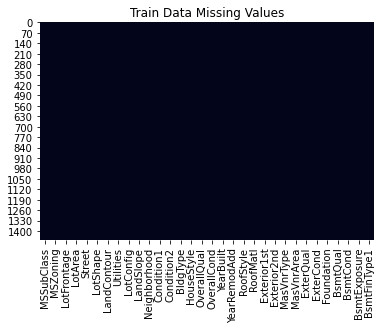

In [9]:
sns.heatmap(x_train.iloc[:,0:32].isnull(),cbar=False).set_title("Train Data Missing Values")

Text(0.5, 1.0, 'Test Data Missing Values')

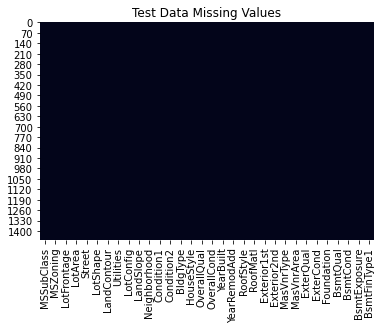

In [10]:
sns.heatmap(x_test.iloc[:,0:32].isnull(),cbar=False).set_title("Test Data Missing Values")

Text(0.5, 1.0, 'Train Data Missing Values')

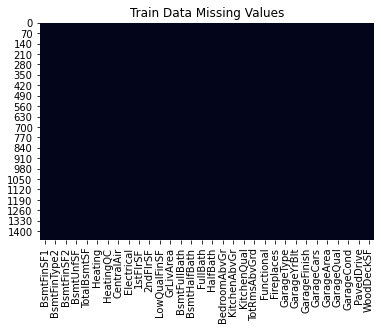

In [11]:
sns.heatmap(x_train.iloc[:,32:64].isnull(),cbar=False).set_title("Train Data Missing Values")

Text(0.5, 1.0, 'Test Data Missing Values')

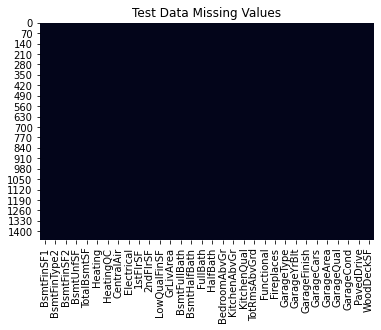

In [12]:
sns.heatmap(x_test.iloc[:,32:64].isnull(),cbar=False).set_title("Test Data Missing Values")

Text(0.5, 1.0, 'Train Data Missing Values')

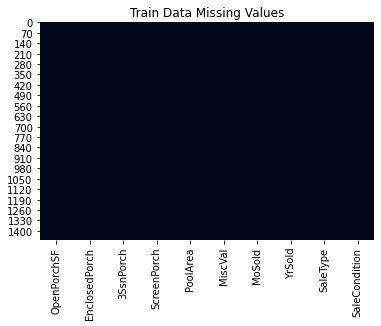

In [13]:
sns.heatmap(x_train.iloc[:,64:].isnull(),cbar=False).set_title("Train Data Missing Values")

Text(0.5, 1.0, 'Test Data Missing Values')

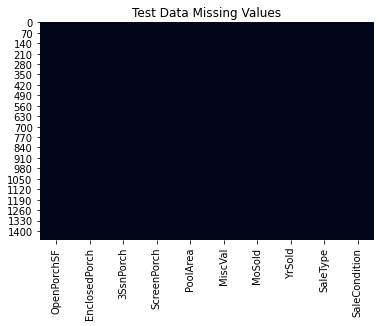

In [14]:
sns.heatmap(x_test.iloc[:,64:].isnull(),cbar=False).set_title("Test Data Missing Values")

Text(0.5, 1.0, 'Train Data Missing Values')

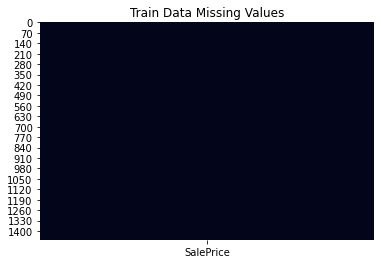

In [15]:
sns.heatmap(y_train.isnull(),cbar=False).set_title("Train Data Missing Values")

In [16]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x_train, y_train, test_size=0.1, random_state=0)

In [17]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
regressor = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,),verbose=True)
svr_model = regressor.fit(x_train, y_train)
xgb = xg.XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
xgb_model = xgb.fit(x_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing robustscaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svr, total=   0.1s
[01:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\meetd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [18]:
y_pred = svr_model.predict(x_te)
y_te = np.array(y_te)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_te.reshape(len(y_te),1)),1))

[[161414.65453223 200624.        ]
 [162848.945092   133000.        ]
 [161611.13672    110000.        ]
 [163454.11444146 192000.        ]
 [163332.61730892  88000.        ]
 [162217.72810828  85000.        ]
 [163464.98407949 282922.        ]
 [163440.6799812  141000.        ]
 [163529.95625621 745000.        ]
 [163398.21414844 148800.        ]
 [163440.50082025 208900.        ]
 [163391.1368633  136905.        ]
 [163466.01499073 225000.        ]
 [163380.68095834 123000.        ]
 [163351.56812048 119200.        ]
 [163359.52942003 145000.        ]
 [163453.51517426 190000.        ]
 [163360.15215944 123600.        ]
 [163373.23513909 149350.        ]
 [163367.24670081 155000.        ]
 [163363.6605573  166000.        ]
 [163402.56247704 144500.        ]
 [162140.79702263 110000.        ]
 [163411.39901466 174000.        ]
 [163423.15252956 185000.        ]
 [163390.66612838 168000.        ]
 [163410.91507619 177500.        ]
 [162033.61751277  84500.        ]
 [163514.97433485 32

In [19]:
y_pred2 = xgb_model.predict(x_te)
y_te = np.array(y_te)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_te.reshape(len(y_te),1)),1))

[[161414.65453223 200624.        ]
 [162848.945092   133000.        ]
 [161611.13672    110000.        ]
 [163454.11444146 192000.        ]
 [163332.61730892  88000.        ]
 [162217.72810828  85000.        ]
 [163464.98407949 282922.        ]
 [163440.6799812  141000.        ]
 [163529.95625621 745000.        ]
 [163398.21414844 148800.        ]
 [163440.50082025 208900.        ]
 [163391.1368633  136905.        ]
 [163466.01499073 225000.        ]
 [163380.68095834 123000.        ]
 [163351.56812048 119200.        ]
 [163359.52942003 145000.        ]
 [163453.51517426 190000.        ]
 [163360.15215944 123600.        ]
 [163373.23513909 149350.        ]
 [163367.24670081 155000.        ]
 [163363.6605573  166000.        ]
 [163402.56247704 144500.        ]
 [162140.79702263 110000.        ]
 [163411.39901466 174000.        ]
 [163423.15252956 185000.        ]
 [163390.66612838 168000.        ]
 [163410.91507619 177500.        ]
 [162033.61751277  84500.        ]
 [163514.97433485 32

In [20]:
from sklearn.metrics import mean_squared_log_error
loss = mean_squared_log_error(y_te, y_pred)
print("Avg loss SVR = ",loss)

Avg loss SVR =  0.1367851550199687


In [21]:
loss = mean_squared_log_error(y_te, y_pred2)
print("Avg loss XGB = ",loss)

Avg loss XGB =  0.0032708963530392646


In [22]:
sample = pd.read_csv(r'C:\Users\meetd\OneDrive\Desktop\Datasets\house-prices-advanced-regression\sample_submission.csv')

In [23]:
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [24]:
y_pred = svr_model.predict(x_test)
y_pred2 = xgb_model.predict(x_test)

In [25]:
sample['SalePrice'] = y_pred2
sample.head()

,Id,SalePrice
0,1461,125676.78125
1,1462,161358.53125
2,1463,184365.18750
3,1464,188779.09375
4,1465,192142.18750


In [26]:
sample.to_csv(r'C:\Users\meetd\OneDrive\Desktop\Datasets\my_submission.csv',index=False)
print('Submission Saved Succesfully')

Submission Saved Succesfully


In [27]:
for i in x_train.columns:
    print(i)
print(len(x_train.columns))

MSSubClass
MSZoning
LotFrontage
LotArea
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SaleType
SaleCondition
74
